#📌 Extracão

In [30]:
import requests
import pandas as pd

In [31]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
resposta = requests.get(url)
dados = resposta.json()

df = pd.DataFrame(dados)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [33]:
df_normalisado = pd.json_normalize(dados)
df_normalisado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [34]:
df_normalisado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [35]:
for coluna in df_normalisado.columns:
  val_unicos = df_normalisado[coluna].unique()
  total = len(df_normalisado)
  if len(val_unicos) < 50:
    print(f'{coluna} - {val_unicos} - {total}')
    print('-' * 50)

Churn - ['No' 'Yes' ''] - 7267
--------------------------------------------------
customer.gender - ['Female' 'Male'] - 7267
--------------------------------------------------
customer.SeniorCitizen - [0 1] - 7267
--------------------------------------------------
customer.Partner - ['Yes' 'No'] - 7267
--------------------------------------------------
customer.Dependents - ['Yes' 'No'] - 7267
--------------------------------------------------
phone.PhoneService - ['Yes' 'No'] - 7267
--------------------------------------------------
phone.MultipleLines - ['No' 'Yes' 'No phone service'] - 7267
--------------------------------------------------
internet.InternetService - ['DSL' 'Fiber optic' 'No'] - 7267
--------------------------------------------------
internet.OnlineSecurity - ['No' 'Yes' 'No internet service'] - 7267
--------------------------------------------------
internet.OnlineBackup - ['Yes' 'No' 'No internet service'] - 7267
--------------------------------------------------


In [36]:
df_normalisado.duplicated().sum()

np.int64(0)

In [37]:
df_normalisado.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [38]:
df_normalisado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [39]:
churn_limpo = df_normalisado['Churn'][df_normalisado['Churn'].apply(lambda x: str(x).strip() != '')]
valor_mais_comum = churn_limpo.mode()[0]
df_normalisado['Churn'] = df_normalisado['Churn'].apply(lambda x: valor_mais_comum if str(x).strip() == '' else x)

In [40]:
df_normalisado['account.Charges.Total'] = pd.to_numeric(df_normalisado['account.Charges.Total'], errors='coerce')
df_normalisado['account.Charges.Total'] = df_normalisado['account.Charges.Total'].astype(float)
media = df_normalisado['account.Charges.Total'].mean()
df_normalisado['account.Charges.Total'] = df_normalisado['account.Charges.Total'].fillna(media)


In [41]:
df_normalisado.nsmallest(10, 'account.Charges.Total')['account.Charges.Total']

,account.Charges.Total
2111,18.80
6542,18.85
6759,18.85
7058,18.90
7257,18.90
1012,19.00
707,19.05
4463,19.10
4795,19.10
6842,19.10


In [42]:
df_normalisado.nlargest(10, 'account.Charges.Total')['account.Charges.Total']

,account.Charges.Total
2053,8684.80
5523,8672.45
7072,8670.10
7109,8594.40
6461,8564.75
7215,8547.15
477,8543.25
4861,8529.50
99,8496.70
1062,8477.70


In [43]:
df_normalisado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [44]:
df_normalisado = df_normalisado.drop('Contas_Diarias', errors='ignore') #Apaga se a coluna já existir
df_normalisado['Contas_Diarias'] = ((df_normalisado['account.Charges.Total'] / df_normalisado['customer.tenure']) /30 ).round(2)
df_normalisado.insert(19, 'Contas_Diarias', df_normalisado.pop('Contas_Diarias'))

In [45]:
df_normalisado.columns = [
    'id_cliente',                  # customerID
    'cancelamento',                # Churn
    'genero',                      # customer.gender
    'idoso',                       # customer.SeniorCitizen
    'possui_conjuge',              # customer.Partner
    'possui_dependentes',          # customer.Dependents
    'meses_como_cliente',          # customer.tenure
    'servico_de_telefone',         # phone.PhoneService
    'multiplas_linhas',            # phone.MultipleLines
    'tipo_internet',               # internet.InternetService
    'seguranca_online',            # internet.OnlineSecurity
    'backup_online',               # internet.OnlineBackup
    'protecao_dispositivo',        # internet.DeviceProtection
    'suporte_tecnico',             # internet.TechSupport
    'streaming_tv',                # internet.StreamingTV
    'streaming_filmes',            # internet.StreamingMovies
    'tipo_contrato',               # account.Contract
    'fatura_digital',              # account.PaperlessBilling
    'forma_pagamento',             # account.PaymentMethod
    'contas_diarias',              # Contas_Diarias
    'valor_mensal',                # account.Charges.Monthly
    'valor_total'                  # account.Charges.Total
]

In [46]:
df_normalisado['idoso'] = df_normalisado['idoso'].astype(int)

colunas_binarias = ['cancelamento',
                    'possui_conjuge',
                    'possui_dependentes',
                    'servico_de_telefone',
                    'fatura_digital']

for coluna in colunas_binarias:
  df_normalisado[coluna] = df_normalisado[coluna].map({'Yes': 1, 'No': 0})

In [47]:
colunas_de_internet = ['seguranca_online',
                      'backup_online',
                      'protecao_dispositivo',
                      'suporte_tecnico',
                      'streaming_tv',
                      'streaming_filmes']

df_normalisado['sem_internet'] = df_normalisado[colunas_de_internet].apply(
    lambda linha: 1 if 'No internet service' in linha.values else 0,
    axis=1
)

for coluna in colunas_de_internet:
    df_normalisado[coluna] = df_normalisado[coluna].map({
        'Yes': 1,
        'No': 0,
        'No internet service': 0
    })


In [48]:
df_normalisado['sem_internet'] = df_normalisado['sem_internet'] | (df_normalisado['tipo_internet'].str.lower() == 'no').astype(int)

In [49]:
df_normalisado = df_normalisado[df_normalisado['tipo_internet'].str.lower() != 'no']

In [50]:
df_normalisado['sem_telefone'] = df_normalisado['multiplas_linhas'].apply(
    lambda x: 1 if x == 'No phone service' else 0
)

df_normalisado['multiplas_linhas'] = df_normalisado['multiplas_linhas'].map({
    'Yes': 1,
    'No': 0,
    'No phone service': 0
})


In [51]:
for coluna in df_normalisado.columns:
  val_unicos = df_normalisado[coluna].unique()
  total = len(df_normalisado)
  if len(val_unicos) < 50:
    print(f'{coluna} - {val_unicos} - {total}')
    print('-' * 50)

cancelamento - [0 1] - 5686
--------------------------------------------------
genero - ['Female' 'Male'] - 5686
--------------------------------------------------
idoso - [0 1] - 5686
--------------------------------------------------
possui_conjuge - [1 0] - 5686
--------------------------------------------------
possui_dependentes - [1 0] - 5686
--------------------------------------------------
servico_de_telefone - [1 0] - 5686
--------------------------------------------------
multiplas_linhas - [0 1] - 5686
--------------------------------------------------
tipo_internet - ['DSL' 'Fiber optic'] - 5686
--------------------------------------------------
seguranca_online - [0 1] - 5686
--------------------------------------------------
backup_online - [1 0] - 5686
--------------------------------------------------
protecao_dispositivo - [0 1] - 5686
--------------------------------------------------
suporte_tecnico - [1 0] - 5686
--------------------------------------------------
s

#📊 Carga e análise

In [52]:
colunas_quantitativas = [
    'meses_como_cliente',
    'valor_mensal',
    'valor_total'
]

tabela_agrupada1 = df_normalisado[colunas_quantitativas].describe()
tabela_agrupada1.style.format('{:.2f}')

,meses_como_cliente,valor_mensal,valor_total
count,5686.00,5686.00,5686.00
mean,32.83,76.85,2727.70
std,24.61,21.96,2358.22
min,0.00,23.45,23.45
25%,9.00,59.90,581.02
50%,30.00,79.45,2134.90
75%,56.00,94.49,4533.85
max,72.00,118.75,8684.80


In [53]:
df_normalisado['cancelamento'].value_counts()

,count
cancelamento,
0,3930
1,1756


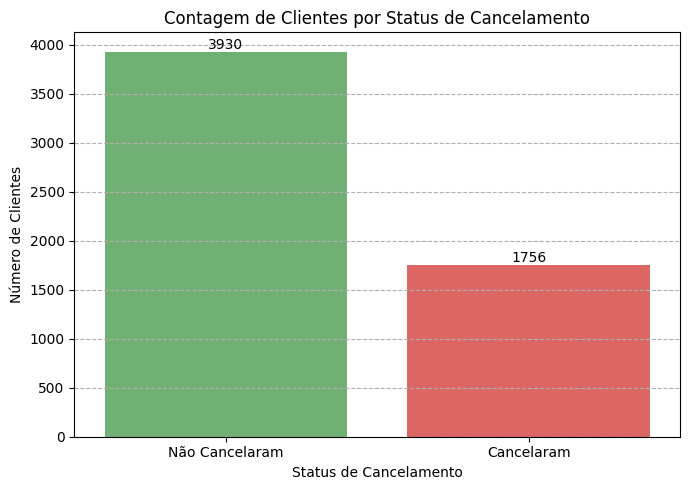

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

contagem_cancelamento = df_normalisado['cancelamento'].value_counts()

plt.figure(figsize=(7, 5))

ax = sns.barplot(
    x=contagem_cancelamento.index,
    y=contagem_cancelamento.values,
    hue=contagem_cancelamento.index,
    legend=False,
    palette=['#66bb6a', '#ef5350']
)

plt.xlabel('Status de Cancelamento')
plt.ylabel('Número de Clientes')
plt.title('Contagem de Clientes por Status de Cancelamento')

plt.xticks([0, 1], ['Não Cancelaram', 'Cancelaram'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()


In [55]:
tabela_agrupada = df_normalisado.groupby('cancelamento')[colunas_quantitativas].agg(['mean', 'median', 'std'])
tabela_agrupada.style.format('{:.2f}')

/tmp/ipython-input-2197351541.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


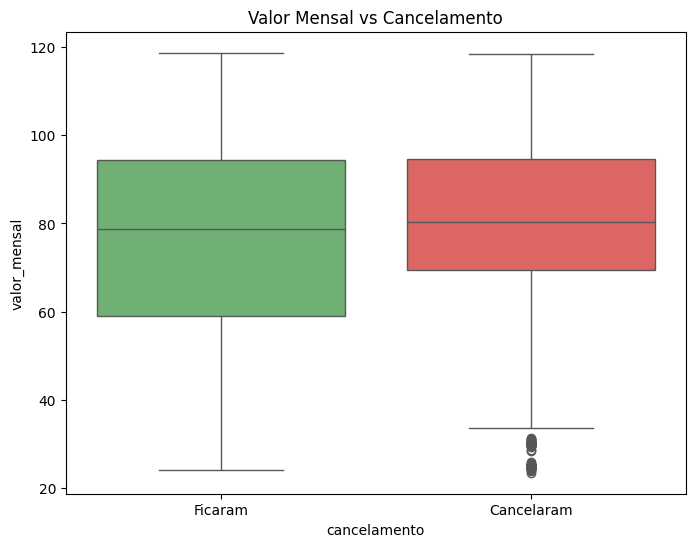

In [70]:
plt.figure(figsize=(8,6))

sns.boxplot(
    x='cancelamento',
    y='valor_mensal',
    data=df_normalisado,
    palette=['#66bb6a', '#ef5350']
)

plt.title("Valor Mensal vs Cancelamento")
plt.xticks([0, 1], ['Ficaram', 'Cancelaram'])
plt.show()


/tmp/ipython-input-4234654192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


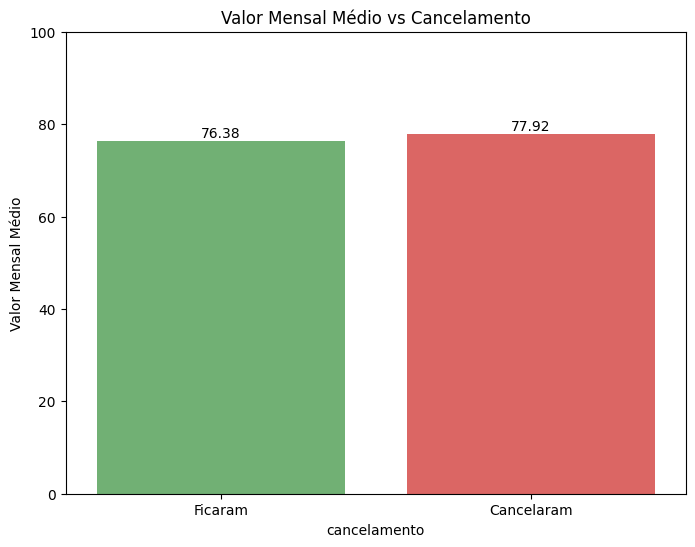

In [69]:
plt.figure(figsize=(8,6))

ax = sns.barplot(
    x='cancelamento',
    y='valor_mensal',
    data=df_normalisado,
    errorbar=None,
    palette=['#66bb6a', '#ef5350']
)

plt.xticks([0, 1], ['Ficaram', 'Cancelaram'])
plt.ylabel('Valor Mensal Médio')
plt.title('Valor Mensal Médio vs Cancelamento')
plt.ylim(0, 100)

for barra_container in ax.containers:
    ax.bar_label(barra_container, fmt='%.2f')

plt.show()


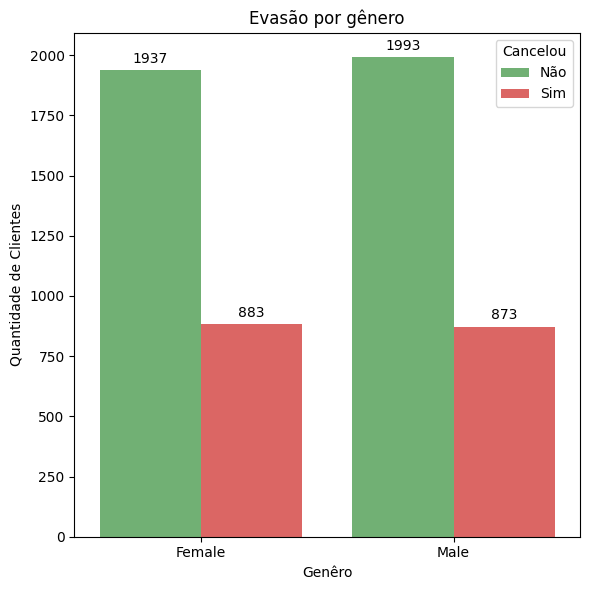

In [58]:
plt.figure(figsize=(6,6))

ax = sns.countplot(x='genero', hue='cancelamento', data=df_normalisado, palette=['#66bb6a', '#ef5350'])

plt.title(f'Evasão por gênero')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Genêro')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 30,
                f'{int(altura)}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

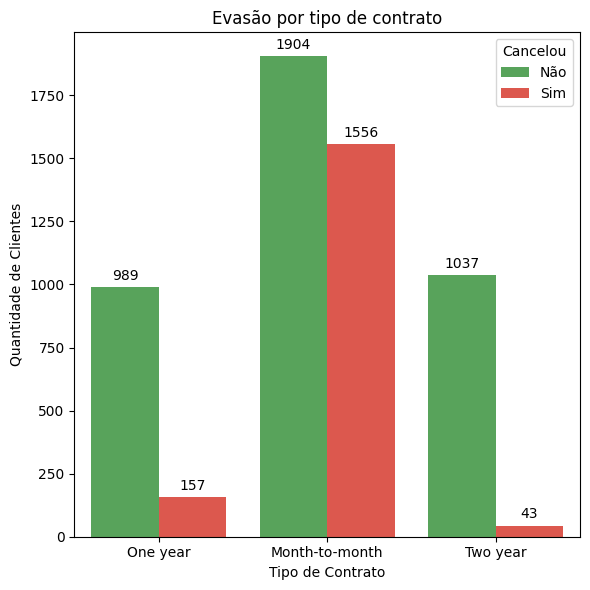

In [59]:
plt.figure(figsize=(6,6))

ax = sns.countplot(x='tipo_contrato', hue='cancelamento', data=df_normalisado, palette=['#4CAF50', '#F44336'])
plt.title(f'Evasão por tipo de contrato')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 30,
                f'{int(altura)}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

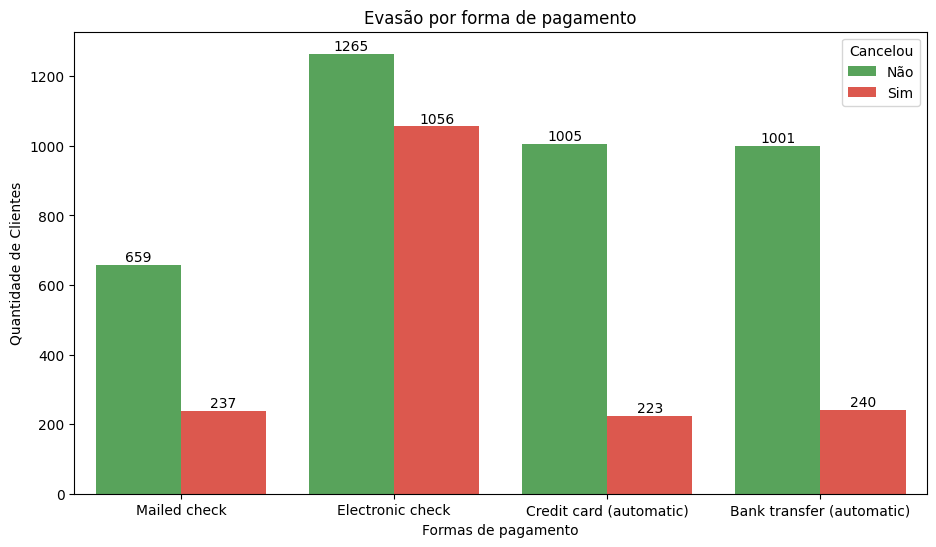

In [60]:
plt.figure(figsize=(11,6))

ax = sns.countplot(x='forma_pagamento', hue='cancelamento', data=df_normalisado, palette=['#4CAF50', '#F44336'])
plt.title(f'Evasão por forma de pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Formas de pagamento')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 10,
                f'{int(altura)}', ha="center", fontsize=10)

plt.show()

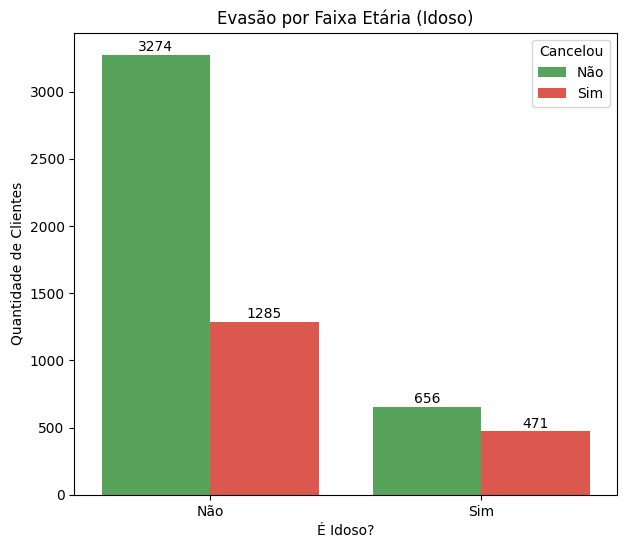

In [61]:
plt.figure(figsize=(7,6))

ax = sns.countplot(x='idoso', hue='cancelamento', data=df_normalisado, palette=['#4CAF50', '#F44336'])
plt.title('Evasão por Faixa Etária (Idoso)')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('É Idoso?')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 30,
                f'{int(altura)}', ha="center", fontsize=10)

plt.show()

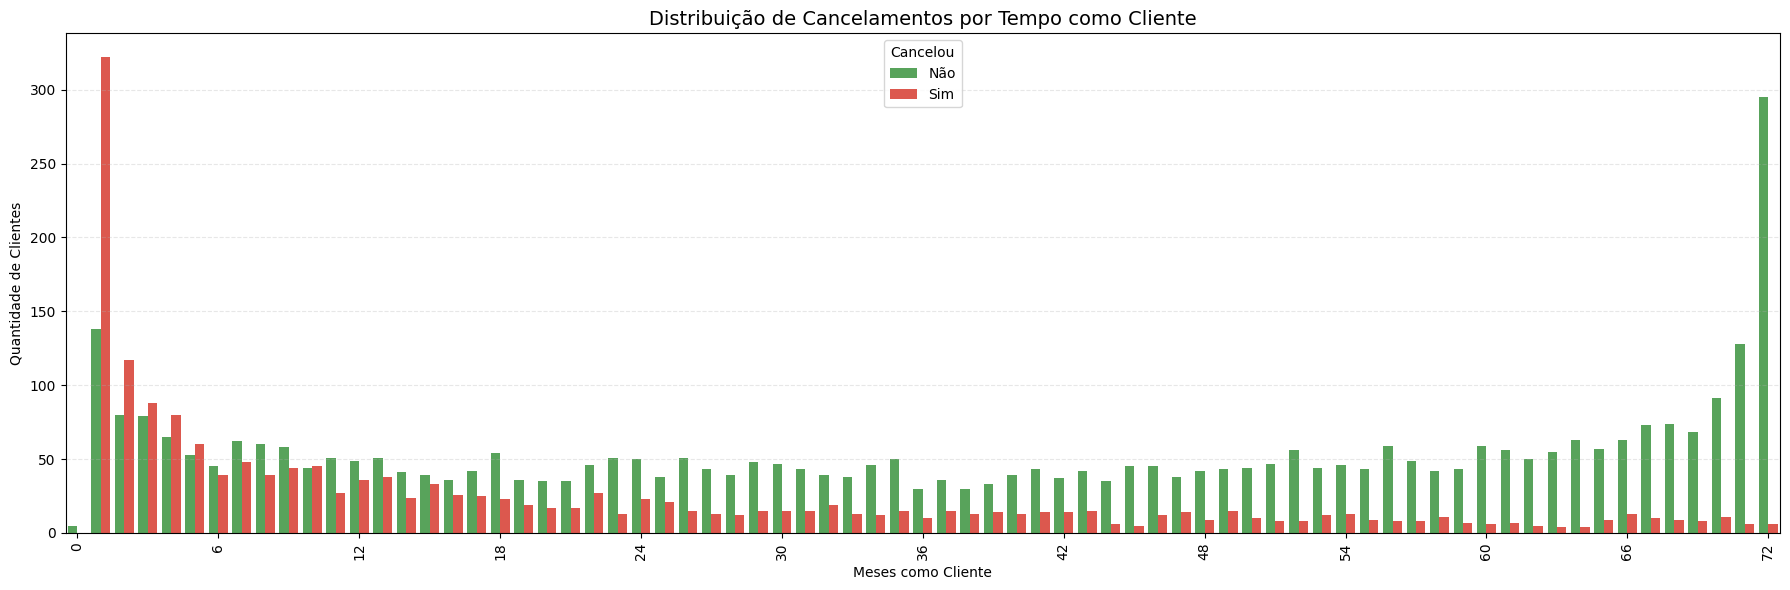

In [62]:
plt.figure(figsize=(18,6))

sns.countplot(data=df_normalisado,
              x='meses_como_cliente',
              hue='cancelamento',
              palette=['#4CAF50', '#F44336'])

plt.title('Distribuição de Cancelamentos por Tempo como Cliente', fontsize=14)
plt.xlabel('Meses como Cliente')
plt.ylabel('Quantidade de Clientes')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])
xticks = list(range(0, df_normalisado['meses_como_cliente'].max() + 1, 6))
plt.xticks(xticks)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


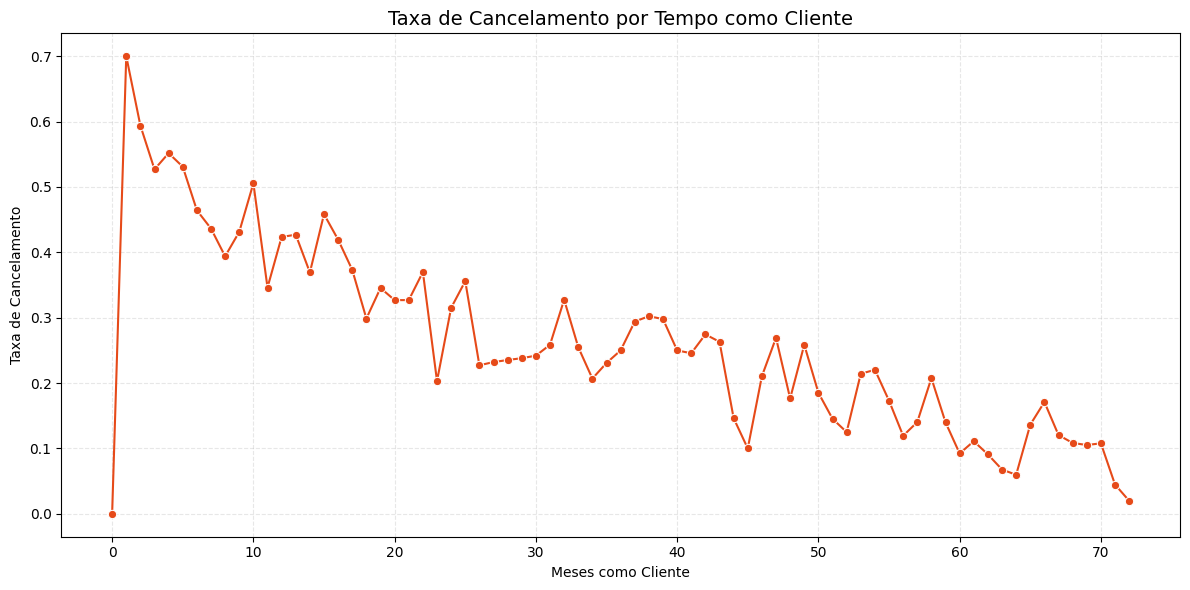

In [63]:
cancelamento_por_mes = df_normalisado.groupby('meses_como_cliente')['cancelamento'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=cancelamento_por_mes, x='meses_como_cliente', y='cancelamento', color='#E64A19', marker='o')

plt.title('Taxa de Cancelamento por Tempo como Cliente', fontsize=14)
plt.xlabel('Meses como Cliente')
plt.ylabel('Taxa de Cancelamento')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


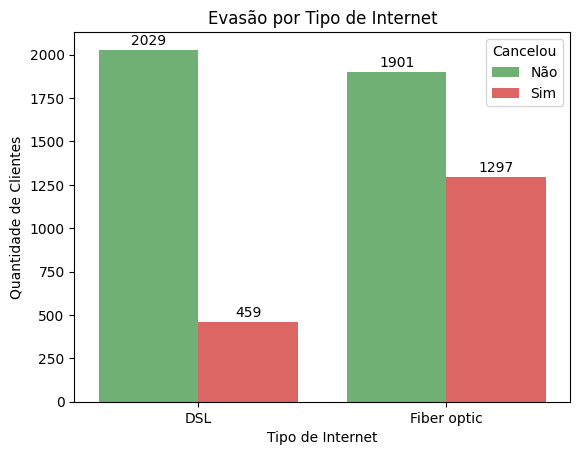

In [64]:
ax = sns.countplot(x='tipo_internet', hue='cancelamento', data=df_normalisado, palette=['#66bb6a', '#ef5350'])
plt.title('Evasão por Tipo de Internet')
plt.ylabel('Quantidade de Clientes')
plt.xlabel('Tipo de Internet')
plt.legend(title='Cancelou', labels=['Não', 'Sim'])

for p in ax.patches:
    altura = p.get_height()
    if altura > 0:
        ax.text(p.get_x() + p.get_width() / 2., altura + 30,
                f'{int(altura)}', ha="center", fontsize=10)

plt.show()

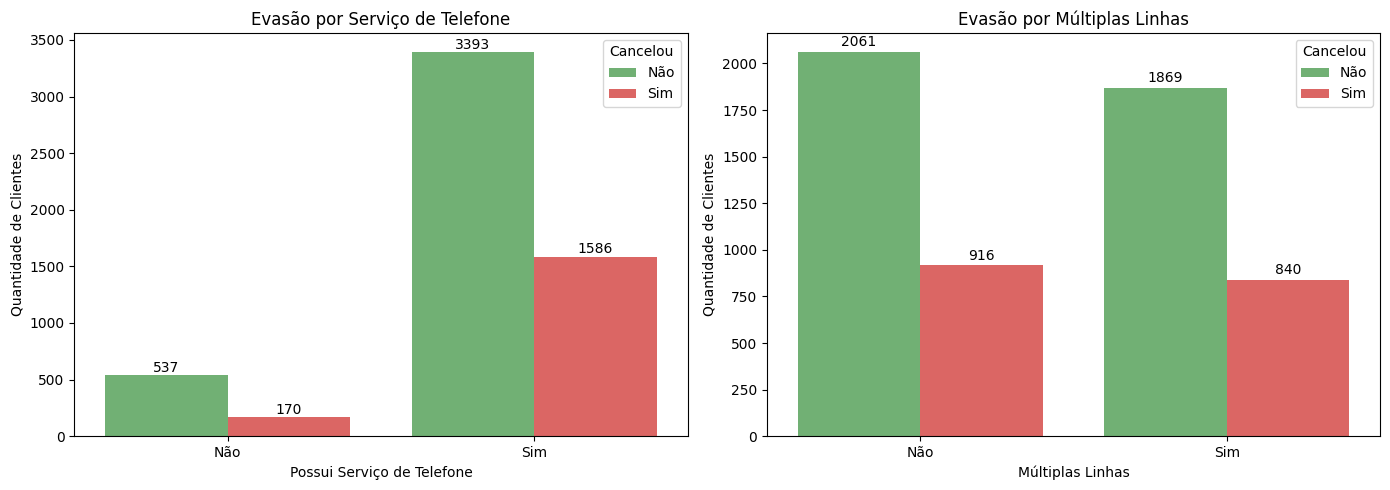

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x='servico_de_telefone', hue='cancelamento', data=df_normalisado,
              palette=['#66bb6a', '#ef5350'], ax=axes[0])
axes[0].set_title('Evasão por Serviço de Telefone')
axes[0].set_ylabel('Quantidade de Clientes')
axes[0].set_xlabel('Possui Serviço de Telefone')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não', 'Sim'])
axes[0].legend(title='Cancelou', labels=['Não', 'Sim'])

for p in axes[0].patches:
    altura = p.get_height()
    if altura > 0:
        axes[0].text(p.get_x() + p.get_width() / 2., altura + 30,
                     f'{int(altura)}', ha='center', fontsize=10)

sns.countplot(x='multiplas_linhas', hue='cancelamento', data=df_normalisado,
              palette=['#66bb6a', '#ef5350'], ax=axes[1])
axes[1].set_title('Evasão por Múltiplas Linhas')
axes[1].set_ylabel('Quantidade de Clientes')
axes[1].set_xlabel('Múltiplas Linhas')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não', 'Sim'])
axes[1].legend(title='Cancelou', labels=['Não', 'Sim'])

for p in axes[1].patches:
    altura = p.get_height()
    if altura > 0:
        axes[1].text(p.get_x() + p.get_width() / 2., altura + 30,
                     f'{int(altura)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

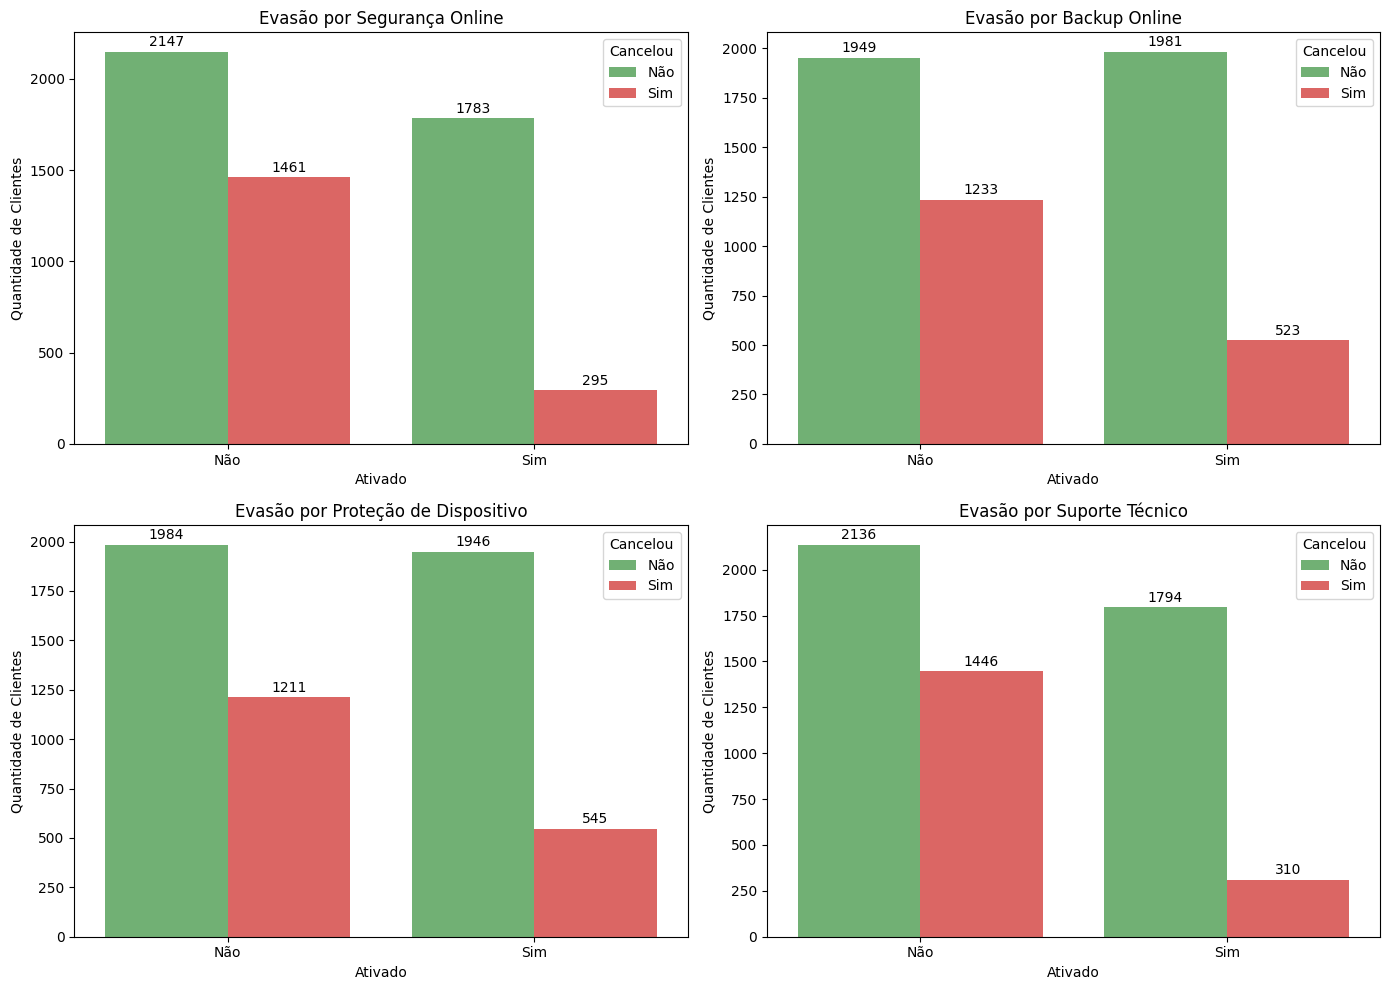

In [66]:
servicos = ['seguranca_online', 'backup_online', 'protecao_dispositivo', 'suporte_tecnico']
titulos = ['Segurança Online', 'Backup Online', 'Proteção de Dispositivo', 'Suporte Técnico']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for i, servico in enumerate(servicos):
    sns.countplot(data=df_normalisado,
                  x=servico,
                  hue='cancelamento',
                  palette=['#66bb6a', '#ef5350'],
                  ax=axes[i])
    axes[i].set_title(f'Evasão por {titulos[i]}')
    axes[i].set_xlabel('Ativado')
    axes[i].set_ylabel('Quantidade de Clientes')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Não', 'Sim'])
    axes[i].legend(title='Cancelou', labels=['Não', 'Sim'])

    for p in axes[i].patches:
        altura = p.get_height()
        if altura > 0:
            axes[i].text(p.get_x() + p.get_width() / 2., altura + 30,
                         f'{int(altura)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

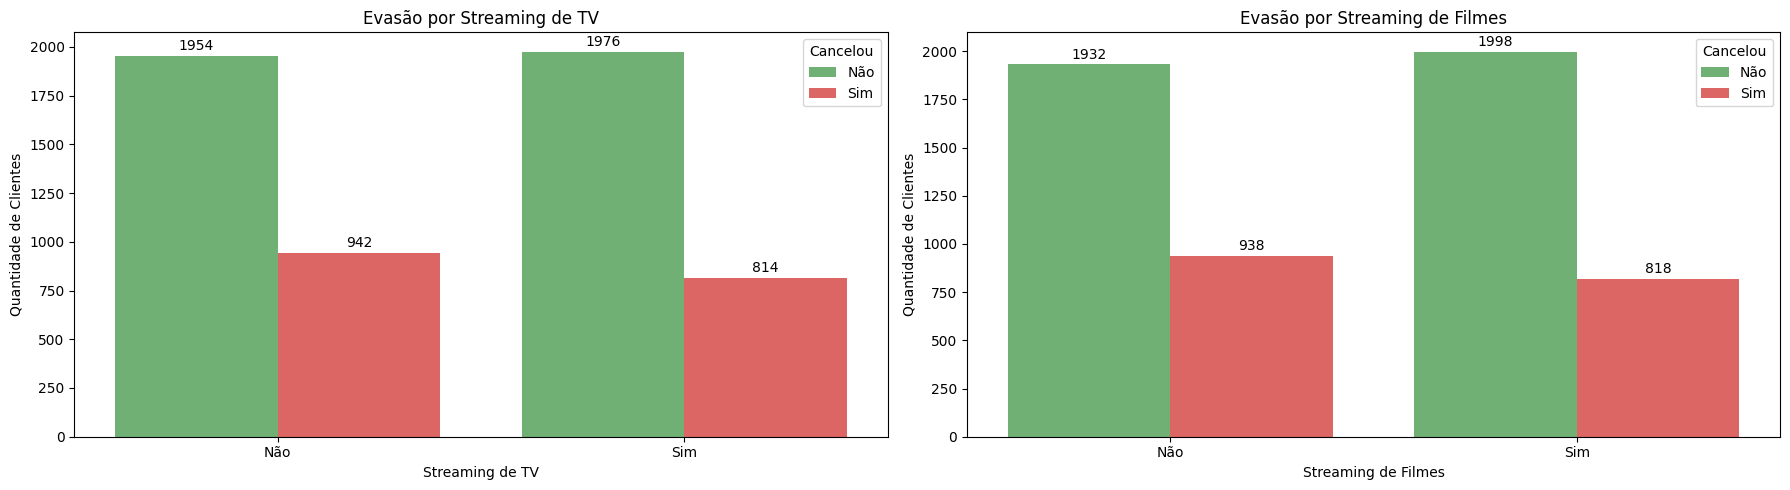

In [67]:
colunas = ['streaming_tv', 'streaming_filmes']
titulos = ['Streaming de TV', 'Streaming de Filmes']

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for i, coluna in enumerate(colunas):
    sns.countplot(x=coluna, hue='cancelamento', data=df_normalisado,
                  palette=['#66bb6a', '#ef5350'], ax=axes[i])
    axes[i].set_title(f'Evasão por {titulos[i]}')
    axes[i].set_ylabel('Quantidade de Clientes')
    axes[i].set_xlabel(titulos[i])
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['Não', 'Sim'])
    axes[i].legend(title='Cancelou', labels=['Não', 'Sim'])

    for p in axes[i].patches:
        altura = p.get_height()
        if altura > 0:
            axes[i].text(p.get_x() + p.get_width() / 2., altura + 30,
                         f'{int(altura)}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

#📄Relatorio Final

## Introdução

A evasão de clientes, também conhecida como **churn**, representa um dos principais desafios enfrentados pelas empresas de telecomunicações. A retenção de clientes é significativamente mais econômica do que a aquisição de novos, tornando a análise de churn essencial para o sucesso estratégico da empresa.

Este estudo foi desenvolvido a partir de um **dataset fictício** da empresa **Telecom X**. O objetivo é **entender os fatores que influenciam o cancelamento de serviços** por parte dos clientes e identificar padrões de comportamento que possam subsidiar ações para **reduzir a evasão**.

---

## Limpeza e Tratamento de Dados

### Importação dos Dados
- Os dados foram importados a partir de um arquivo JSON:
  [`TelecomX_Data.json`](https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json)

### Estrutura Inicial
- O conjunto de dados original continha **6 colunas** e **7267 linhas**, com informações aninhadas (estrutura de dicionário).

### Etapas Realizadas

- **Importação e normalização do JSON original**  
  Utilização da função `pd.json_normalize` para facilitar o acesso aos campos aninhados.

- **Verificação de dados ausentes, espaços em branco e valores nulos**:
  - A variável **`Churn`** (cancelamento) continha campos vazios, que foram preenchidos com o valor mais comum (moda).
  - A variável **`account.Charges.Total`** apresentava valores não numéricos e nulos, que foram convertidos para `float` e preenchidos com a **média da coluna**.

- **Criação da nova coluna `contas_diarias`**  
  Calcula o **custo diário médio do cliente**, com base no valor total e no tempo de contrato.

- **Renomeação de colunas**  
  Padronização e tradução dos nomes das colunas para **termos mais legíveis e em português**.

- **Conversão de variáveis categóricas para binárias**, como:
  - `cancelamento`
  - `possui_conjuge`
  - `possui_dependentes`
  - `servico_de_telefone`
  - `fatura_digital`

- **Tratamento de campos "No internet service" e "No phone service"**:
  - Criação da variável **`sem_internet`** para identificar clientes que não utilizam serviços de internet.
  - **Clientes sem internet foram removidos** da base, já que a ausência de serviço inviabiliz


---

## 📊 Análise Exploratória de Dados (EDA)

A EDA foi essencial para revelar os padrões comportamentais dos clientes que cancelaram o serviço.

### 1. Evasão por Gênero
- **Homens e mulheres apresentam taxas de evasão bastante próximas**, indicando que o gênero não é um fator determinante isolado para o cancelamento.

### 2. Evasão por Idade
- **Clientes idosos** (acima de 65 anos) apresentam uma **taxa de evasão ligeiramente maior**, possivelmente por menor engajamento com serviços digitais.

### 3. Evasão por Tempo como Cliente
- O primeiro mês é crítico — é o único ponto em que os cancelamentos superam os não cancelamentos. Isso sugere que melhorar a experiência inicial pode reduzir a evasão drasticamente.

**1 mês de contrato:**
* 350 cancelaram
* 250 não cancelaram

**72 meses de contrato:**
* < 50 cancelaram
* 350 não cancelaram

### 4. Evasão e Tipo de Internet
- Clientes com internet via fibra óptica cancelam mais que os com DSL, o que pode indicar problemas de estabilidade, atendimento ou expectativa frustrada com a tecnologia.

### 5. Evasão e Tipo de Contrato
- Clientes com contrato mês a mês apresentam a maior taxa de cancelamento. Já contratos de longo prazo tendem a reter mais os clientes.

### 6. Evasão e Serviços Adicionais
- Clientes com serviços de segurança online, backup, suporte técnico e proteção de dispositivo cancelam menos que aqueles sem esses serviços.

### 7. Evasão por Valor Mensal
- Clientes com maior valor mensal têm maior propensão ao cancelamento, indicando possível insatisfação com o custo-benefício.

### 8. Evasão por forma de pagamento
- Clientes que utilizam Electronic Check têm uma taxa de evasão extremamente alta, sugerindo insatisfação associada à experiência de pagamento.

---

## 🔍 Conclusões e Insights

- **Clientes recém-chegados**, com contratos mensais e **sem serviços adicionais** são os **mais propensos a evadir**.
- **A fidelização está diretamente relacionada ao tempo de contrato, tipo de internet e serviços agregados.**
- Clientes que contratam **mais de um serviço**, especialmente os relacionados à segurança e suporte técnico, permanecem mais tempo na base.

---

## ✅ Recomendações Estratégicas

1. **Campanhas de Boas-Vindas**:
   - Criar estratégias de **onboarding eficaz** para os primeiros 3 meses de contrato.
   - Promover o valor dos serviços adicionais logo no início.

2. **Incentivos para Planos de Longo Prazo**:
   - Oferecer descontos progressivos para clientes que migram para planos anuais ou bienais.

3. **Bundles de Serviços**:
   - Criar **pacotes com valor agregado** (ex: streaming + proteção de dispositivo) com preços mais atrativos.

4. **Monitoramento Ativo de Clientes Novos**:
   - Acompanhar os primeiros meses com **pesquisas de satisfação**, atendimento personalizado e ofertas especiais.

5. **Serviço personalizado para idosos**:
    - Implementar uma abordagem personalizada para o público idoso, com canais de atendimento mais acessíveis, suporte humanizado e linguagem simplificada.